In [1]:
!pip install -q plotly seaborn


In [3]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

sns.set(style = "whitegrid")
np.random.seed(42)

os.makedirs("artifacts", exist_ok = True)


In [7]:
# Data loading 
possible_paths = [
    "data/day.csv",
    "data/hour.csv",
    "data/london_merged.csv"
    "/contents/Drive/Mydrive/london_merged.csv"
]

df = None 
for p in possible_paths:
    if os.path.exists(p):
        try:
            df= pd.read_csv(p)
            print(f"Loaded dataset from{p}")
            break
        except Exception as e:
            print(f"Loaded dataset from {p}: {e}")

if df is None:
    print("Dataset not found. Please add a csv to dada/bikeshare_trips.csv")
    df.pd.DataFrame()

#Required Validation
print("df.shape->", df.shape)
print("df.columns->",df.columns.tolist())
display(df.sample(5) if len(df) else "No data available")

Loaded dataset fromdata/day.csv
df.shape-> (731, 16)
df.columns-> ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693,7538


In [11]:
# Data Cleaning 
if df.shape[0] > 0:
    #strip whitespace in object fields 
    for c in df.select_dtypes(include = "object").columns:
        df[c] = df[c].astype(str).str.strip()
    #parse timestamps
    for col in ["Start_time", "started_at","started_at_local","Start Time"]:
        if col in df.columns:
            df["Start Time"] = pd.to_datetime(df[col], errors = "coerse")
            break
    for col in ["end_time","ended_at","stop_Time"]:
        if col in df.columns:
            df["end_time"]= pd.to_datetime(df[col], errors="coerce")
            break
    #Durations computation (fall back if not present)
    if "duration" not in  df.columns and  {"start_time","end_time"}.issubset(df.columns):
        df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds() / 60

    #remove invalid duration
    if "duration" in df.columns:
        df=df[df["duration"]>0]

    print("Cleaned preview:")
    display(df.head()) 
    

Cleaned preview:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


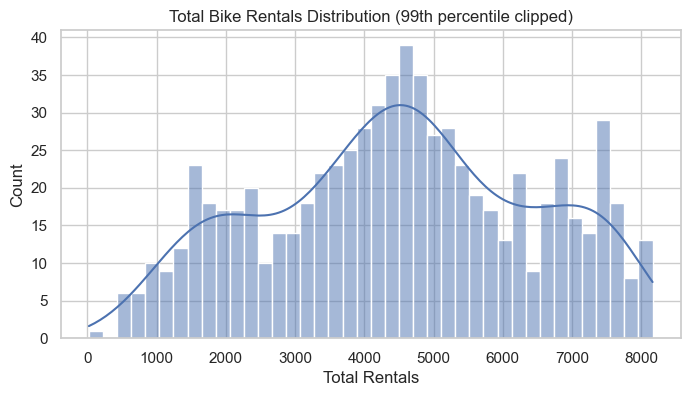

In [15]:
# Total bike rentals distribution
if "cnt" in df.columns:
    cnt = pd.to_numeric(df["cnt"], errors="coerce")

    plt.figure(figsize=(8, 4))
    sns.histplot(
        cnt.dropna().clip(lower=0, upper=cnt.quantile(0.99)),
        bins=40,
        kde=True
    )
    plt.title("Total Bike Rentals Distribution (99th percentile clipped)")
    plt.xlabel("Total Rentals")
    plt.ylabel("Count")
    plt.savefig("artifacts/total_rentals_dist.png", dpi=150, bbox_inches="tight")
    plt.show()


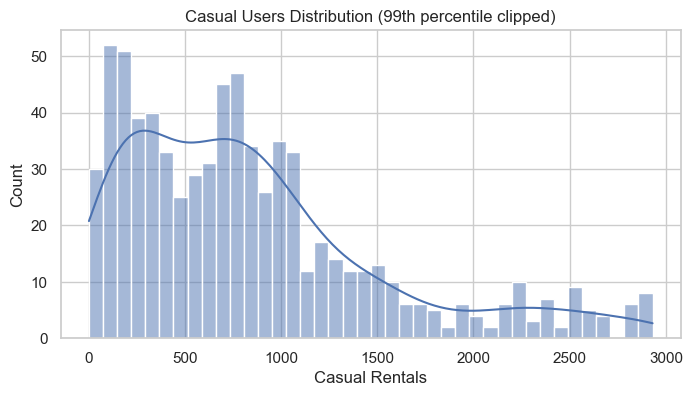

In [16]:
# Casual users distribution
if "casual" in df.columns:
    casual = pd.to_numeric(df["casual"], errors="coerce")

    plt.figure(figsize=(8, 4))
    sns.histplot(
        casual.dropna().clip(lower=0, upper=casual.quantile(0.99)),
        bins=40,
        kde=True
    )
    plt.title("Casual Users Distribution (99th percentile clipped)")
    plt.xlabel("Casual Rentals")
    plt.ylabel("Count")
    plt.savefig("artifacts/casual_rentals_dist.png", dpi=150, bbox_inches="tight")
    plt.show()


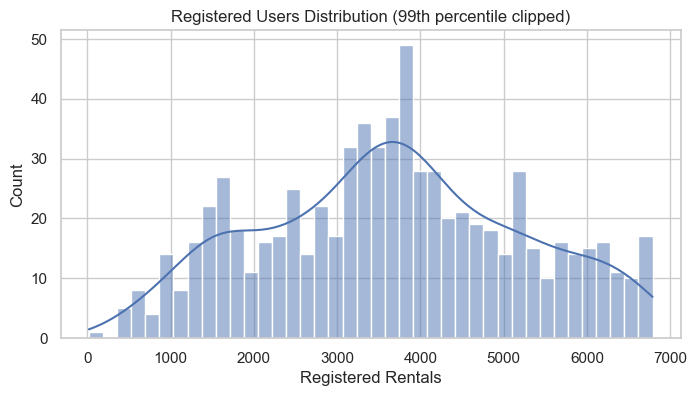

In [17]:
# Registered users distribution
if "registered" in df.columns:
    registered = pd.to_numeric(df["registered"], errors="coerce")

    plt.figure(figsize=(8, 4))
    sns.histplot(
        registered.dropna().clip(lower=0, upper=registered.quantile(0.99)),
        bins=40,
        kde=True
    )
    plt.title("Registered Users Distribution (99th percentile clipped)")
    plt.xlabel("Registered Rentals")
    plt.ylabel("Count")
    plt.savefig("artifacts/registered_rentals_dist.png", dpi=150, bbox_inches="tight")
    plt.show()


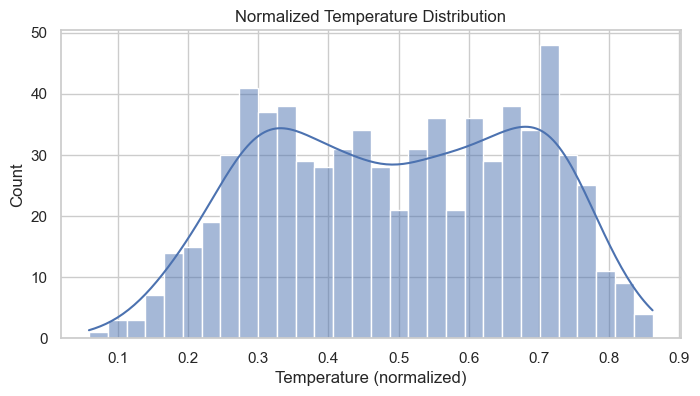

In [18]:
# Temperature distribution
if "temp" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df["temp"].dropna(), bins=30, kde=True)
    plt.title("Normalized Temperature Distribution")
    plt.xlabel("Temperature (normalized)")
    plt.ylabel("Count")
    plt.savefig("artifacts/temperature_dist.png", dpi=150, bbox_inches="tight")
    plt.show()


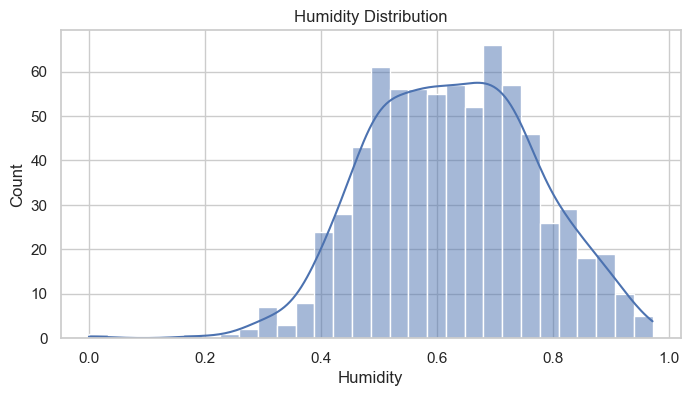

In [19]:
# Humidity distribution
if "hum" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df["hum"].dropna(), bins=30, kde=True)
    plt.title("Humidity Distribution")
    plt.xlabel("Humidity")
    plt.ylabel("Count")
    plt.savefig("artifacts/humidity_dist.png", dpi=150, bbox_inches="tight")
    plt.show()


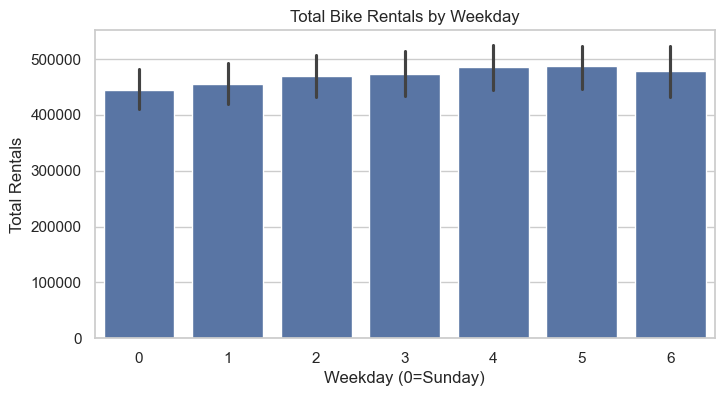

In [22]:
# Trips by weekday
if "weekday" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(x="weekday", y="cnt", data=df, estimator=sum)
    plt.title("Total Bike Rentals by Weekday")
    plt.xlabel("Weekday (0=Sunday)")
    plt.ylabel("Total Rentals")
    plt.savefig("artifacts/trips_by_weekday.png", dpi=150, bbox_inches="tight")
    plt.show()


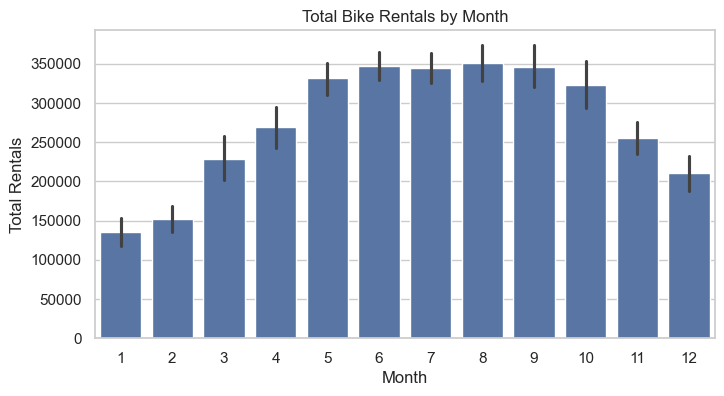

In [24]:
# Trips by month
if "mnth" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(x="mnth", y="cnt", data=df, estimator=sum)
    plt.title("Total Bike Rentals by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Rentals")
    plt.savefig("artifacts/trips_by_month.png", dpi=150, bbox_inches="tight")
    plt.show()


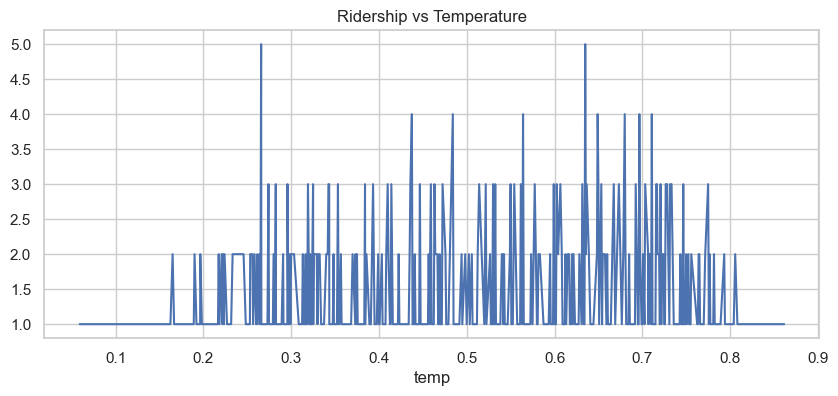

In [25]:
# Weather vs Ridership
if {"temp"}.issubset(df.columns):
    temp_df = df.groupby("temp").size()
    plt.figure(figsize=(10,4))
    temp_df.plot()
    plt.title("Ridership vs Temperature")
    plt.savefig("artifacts/ridership_vs_temp.png", dpi=150, bbox_inches="tight")
    plt.show()


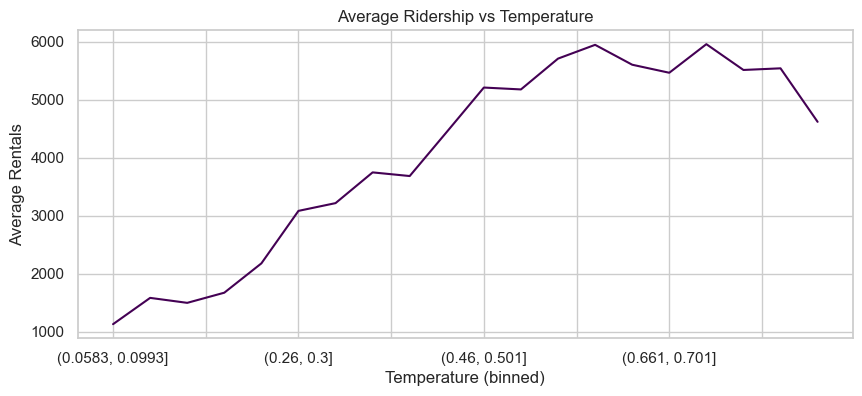

In [36]:
# Ridership vs temperature (binned)
if {"temp", "cnt"}.issubset(df.columns):
    temp_bins = pd.cut(df["temp"], bins=20)
    temp_rides = (
        df.groupby(temp_bins, observed=True)["cnt"]
        .mean()
    )

    plt.figure(figsize=(10, 4))
    temp_rides.plot(colormap="viridis")
    plt.title("Average Ridership vs Temperature")
    plt.xlabel("Temperature (binned)")
    plt.ylabel("Average Rentals")
    plt.savefig("artifacts/ridership_vs_temp.png", dpi=150, bbox_inches="tight")
    plt.show()


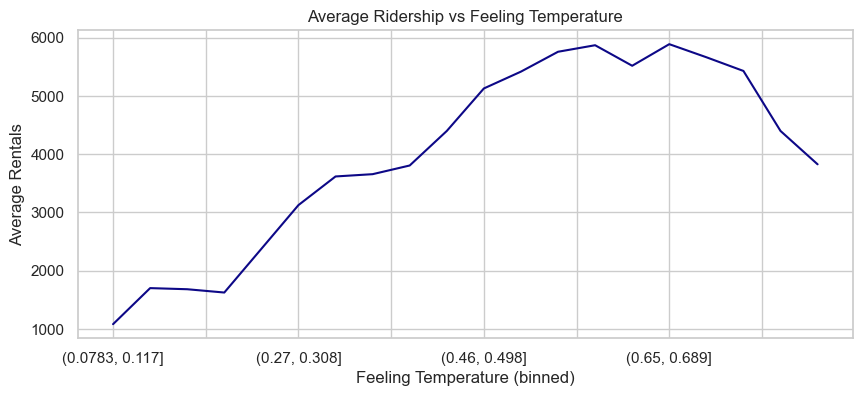

In [35]:
# Ridership vs feeling temperature (future-safe)
if {"atemp", "cnt"}.issubset(df.columns):
    atemp_bins = pd.cut(df["atemp"], bins=20)
    atemp_rides = (
        df.groupby(atemp_bins, observed=True)["cnt"]
        .mean()
    )

    plt.figure(figsize=(10, 4))
    atemp_rides.plot(colormap="plasma")
    plt.title("Average Ridership vs Feeling Temperature")
    plt.xlabel("Feeling Temperature (binned)")
    plt.ylabel("Average Rentals")
    plt.savefig("artifacts/ridership_vs_atemp.png", dpi=150, bbox_inches="tight")
    plt.show()


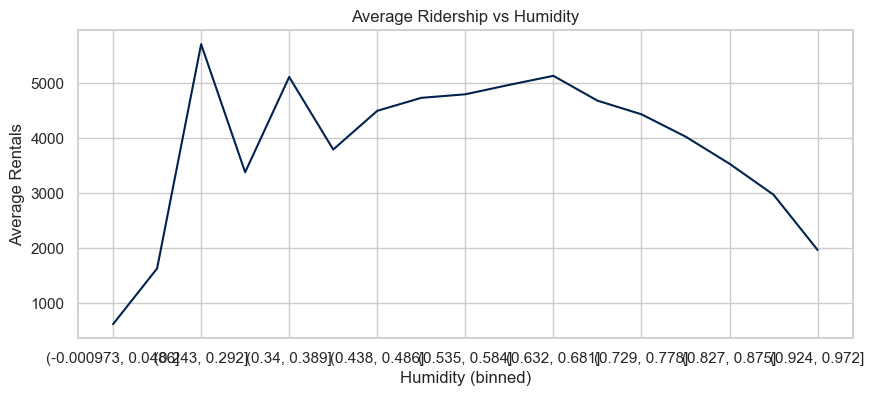

In [34]:
# Ridership vs humidity
if {"hum", "cnt"}.issubset(df.columns):
    hum_bins = pd.cut(df["hum"], bins=20)
    hum_rides = (
        df.groupby(hum_bins, observed=True)["cnt"]
        .mean()
    )

    plt.figure(figsize=(10, 4))
    hum_rides.plot(colormap="cividis")
    plt.title("Average Ridership vs Humidity")
    plt.xlabel("Humidity (binned)")
    plt.ylabel("Average Rentals")
    plt.savefig("artifacts/ridership_vs_humidity.png", dpi=150, bbox_inches="tight")
    plt.show()



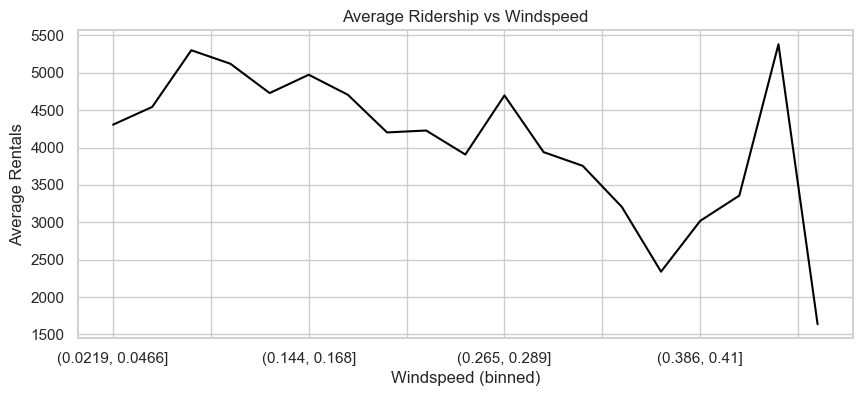

In [33]:
# Ridership vs windspeed
if {"windspeed", "cnt"}.issubset(df.columns):
    wind_bins = pd.cut(df["windspeed"], bins=20)
    wind_rides = (
        df.groupby(wind_bins, observed=True)["cnt"]
        .mean()
    )

    plt.figure(figsize=(10, 4))
    wind_rides.plot(colormap="magma")
    plt.title("Average Ridership vs Windspeed")
    plt.xlabel("Windspeed (binned)")
    plt.ylabel("Average Rentals")
    plt.savefig("artifacts/ridership_vs_windspeed.png", dpi=150, bbox_inches="tight")
    plt.show()


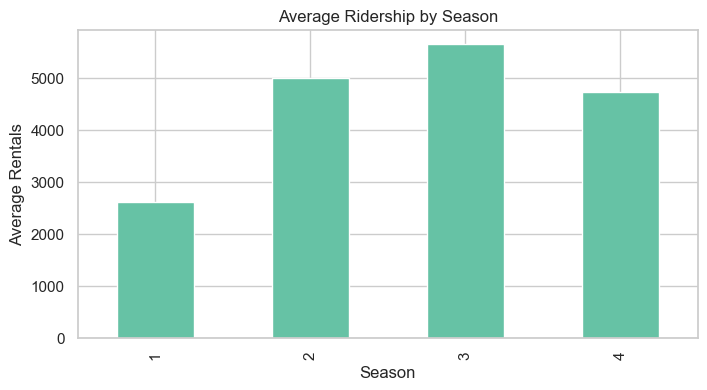

In [31]:
# Ridership vs season
if {"season", "cnt"}.issubset(df.columns):
    season_rides = df.groupby("season")["cnt"].mean()

    plt.figure(figsize=(8, 4))
    season_rides.plot(kind="bar", colormap="Set2")
    plt.title("Average Ridership by Season")
    plt.xlabel("Season")
    plt.ylabel("Average Rentals")
    plt.savefig("artifacts/ridership_by_season.png", dpi=150, bbox_inches="tight")
    plt.show()


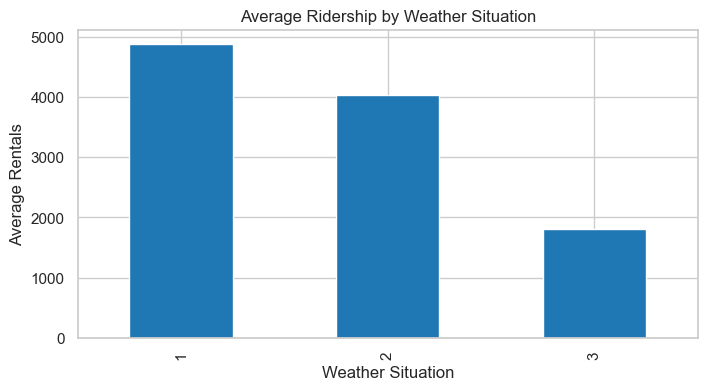

In [32]:
# Ridership vs weather situation
if {"weathersit", "cnt"}.issubset(df.columns):
    weather_rides = df.groupby("weathersit")["cnt"].mean()

    plt.figure(figsize=(8, 4))
    weather_rides.plot(kind="bar", colormap="tab10")
    plt.title("Average Ridership by Weather Situation")
    plt.xlabel("Weather Situation")
    plt.ylabel("Average Rentals")
    plt.savefig("artifacts/ridership_by_weather.png", dpi=150, bbox_inches="tight")
    plt.show()


In [37]:
#Save cleaned snapshot
if df.shape[0] > 0:
    df.to_csv("artifacts/bikeshare_cleaned_snapshot.csv", index=False)
    print("Saved cleaned snapshot.")


Saved cleaned snapshot.
